In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv('iris.csv')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
iris.set_index('species', inplace = True)

iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
setosa,5.4,3.9,1.7,0.4
setosa,4.6,3.4,1.4,0.3
setosa,5.0,3.4,1.5,0.2
setosa,4.4,2.9,1.4,0.2


In [7]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [8]:
iris.shape

(150, 4)

In [9]:
iris.reset_index('species', inplace = True)

iris.head(10)

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
5,setosa,5.4,3.9,1.7,0.4
6,setosa,4.6,3.4,1.4,0.3
7,setosa,5.0,3.4,1.5,0.2
8,setosa,4.4,2.9,1.4,0.2
9,setosa,4.9,3.1,1.5,0.1


<Axes: xlabel='species', ylabel='Count'>

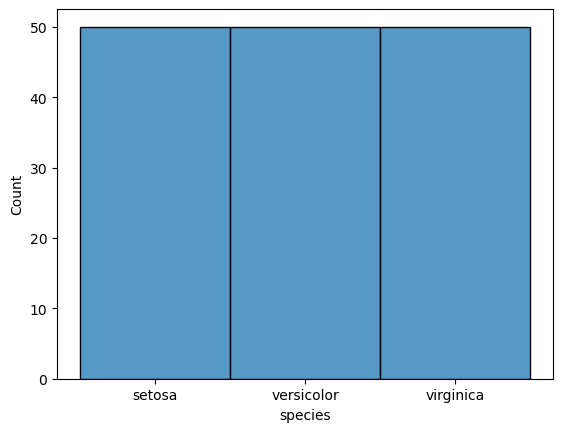

In [10]:
sns.histplot(iris['species'])

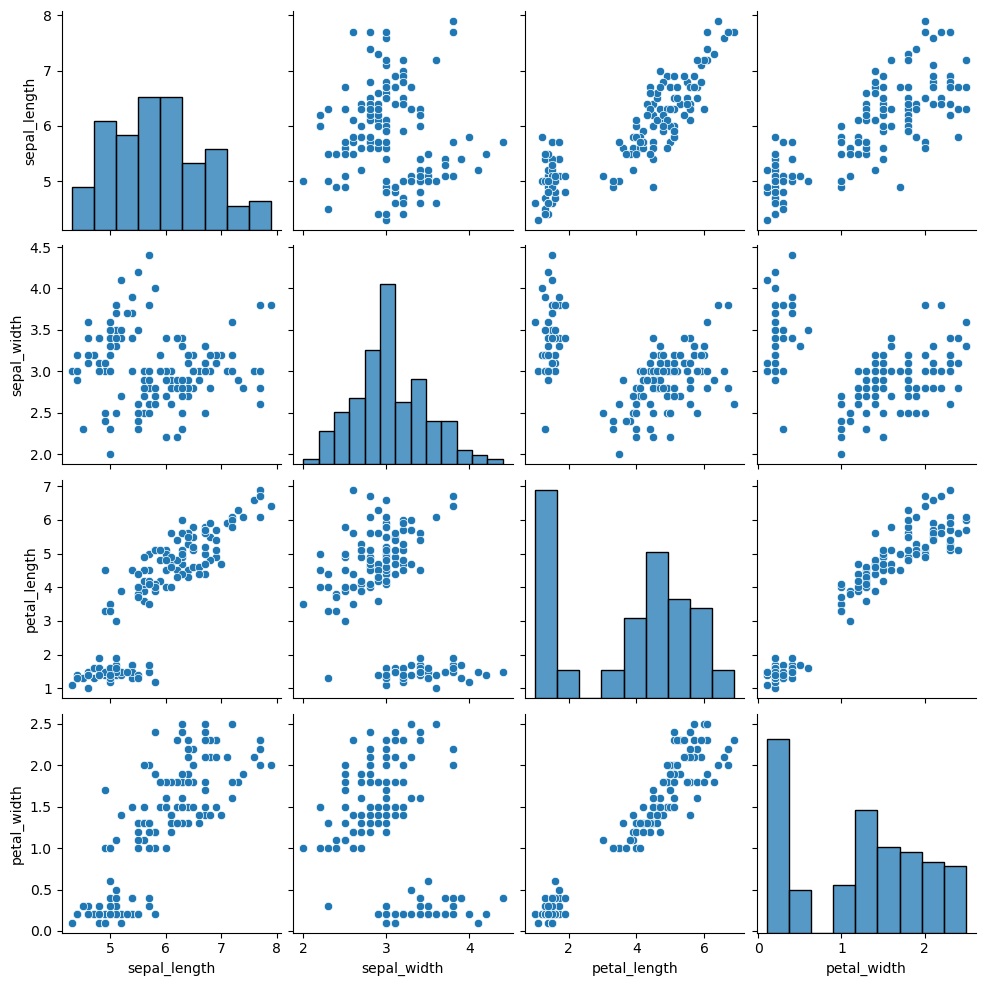

In [11]:
sns.pairplot(iris)

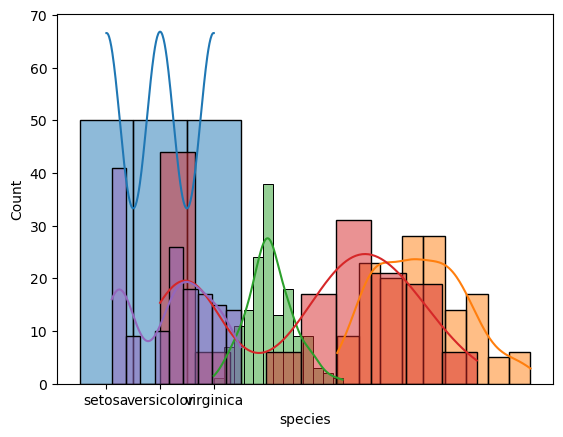

In [12]:
for column in iris.columns:
    sns.histplot(iris[column], kde = True)

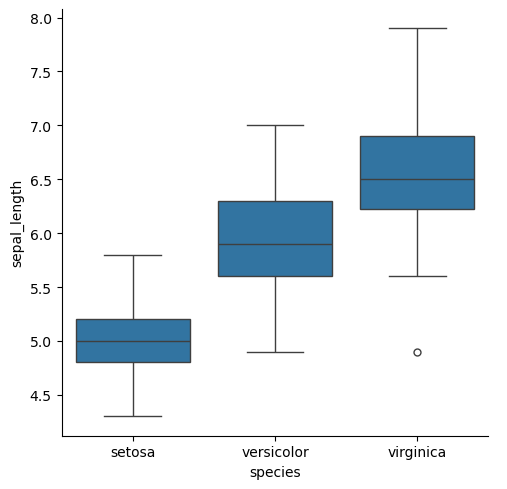

In [13]:
sns.catplot(x = 'species', y = 'sepal_length', data = iris, kind = 'box')

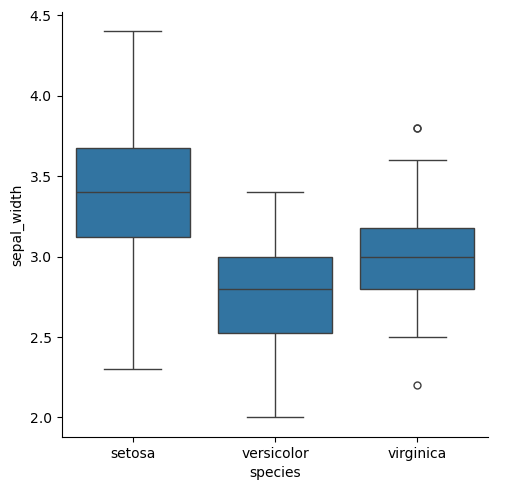

In [14]:
sns.catplot(x = 'species', y = 'sepal_width', data = iris, kind = 'box')

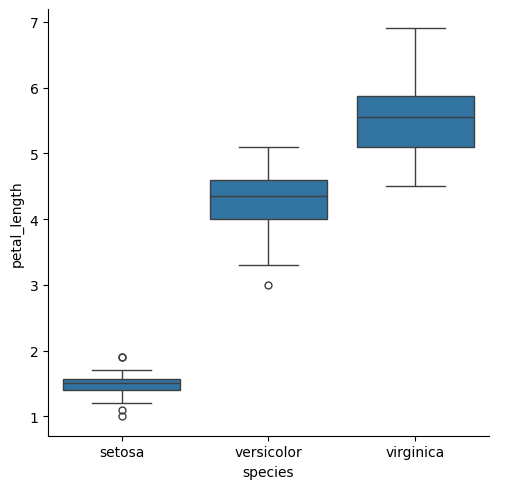

In [15]:
sns.catplot(x = 'species', y = 'petal_length', data = iris, kind = 'box')

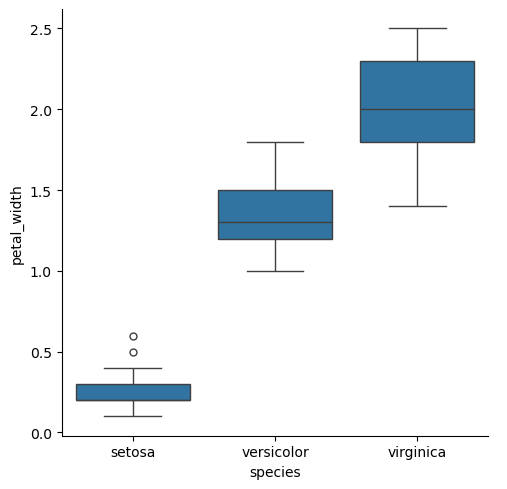

In [16]:
sns.catplot(x = 'species', y = 'petal_width', data = iris, kind = 'box')

<Axes: xlabel='species', ylabel='sepal_width'>

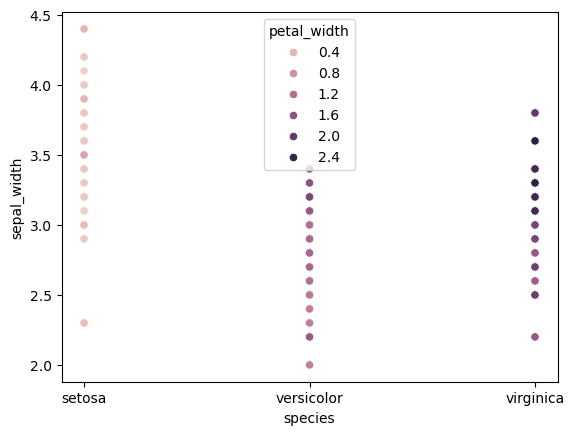

In [17]:
sns.scatterplot(x = 'species', y = 'sepal_width', hue = 'petal_width', data = iris)


<Axes: xlabel='sepal_width', ylabel='Count'>

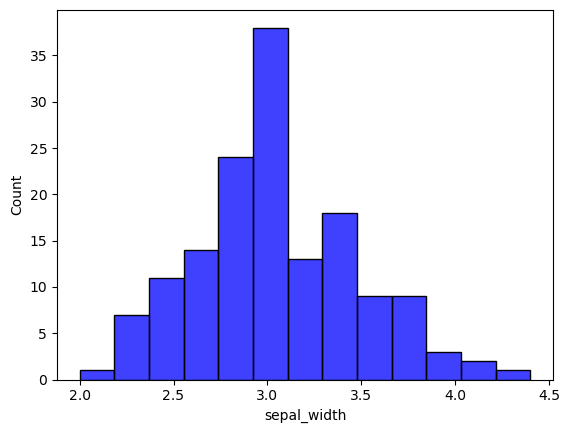

In [18]:
sns.histplot(iris['sepal_width'], color = 'blue')

In [19]:
#X = iris.drop(columns=['species'])
#y = iris['species']

In [20]:
from sklearn.preprocessing import LabelEncoder


In [21]:
le = LabelEncoder()
iris["species_encoded"] = le.fit_transform(iris["species"])

X = iris.drop(columns=["species", "species_encoded"])
y = iris["species_encoded"]


In [22]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species_encoded, Length: 150, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [26]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error

In [27]:
svr = SVR()

In [29]:
svr.fit(X_train, y_train)

SVR()

In [30]:
y_pred_svr = svr.predict(X_test)

In [31]:
print(r2_score(y_test, y_pred_svr))
print(mean_absolute_error(y_test, y_pred_svr))

0.9333651640484292
0.15757277673073788


In [32]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred_log = logistic.predict(X_test)
print(y_pred_log)

[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 2 1 0 2 0]


In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

In [34]:
score = accuracy_score(y_pred_log, y_test)
print("Accuracy score: ", score)
print("Classification Report: \n", classification_report(y_pred_log, y_test))
print("Confusion matrix: \n", confusion_matrix(y_pred_log, y_test))

Accuracy score:  0.9666666666666667
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


In [35]:
model = LogisticRegression()

penalty = ['l1', 'l2', 'elasticnet'] #regularization : lasso, ridge and elastic net

c_values=[100, 10, 1.0, 0.1, 0.01] # inverse of lambda values

solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [36]:
params = dict(penalty=penalty, C=c_values, solver=solver)

In [37]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold()

In [38]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator = model, param_grid = params, scoring = 'accuracy', cv = 10)

In [39]:
grid.fit(X_train,y_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was re

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [40]:
grid.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}

In [41]:
grid.best_score_

np.float64(0.9833333333333332)

In [42]:
y_pred_gs = grid.predict(X_test)

score = accuracy_score(y_pred_gs, y_test)
print(score)
print(classification_report(y_pred_gs, y_test))
print(confusion_matrix(y_pred_gs, y_test))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
clf = DecisionTreeClassifier(random_state = 55) 

clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [46]:
y_pred_dt = clf.predict(X_test) 

accuracy = accuracy_score(y_test, y_pred_dt) 
print(f"Accuracy: {accuracy :2f}")

report = classification_report(y_test, y_pred_dt) #generating classification report
print("Classification Report : \n", report)

Accuracy: 0.966667
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [47]:
param_grid = {   
    'criterion' : ['gini', 'entropy'],   
    'max_depth' : [None, 5, 10, 15], 
    'min_samples_split' : [2, 5, 10], 
    'min_samples_leaf' : [1, 2, 4] #max no of leaf nodes
}

grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 10) #initializing gridsearchcv

grid_search.fit(X_train, y_train) 

best_params = grid_search.best_params_   
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [48]:
# final model

best_clf = DecisionTreeClassifier(**best_params, random_state = 123) 

best_clf.fit(X_train, y_train) 

y_pred_optimized = best_clf.predict(X_test) 

accuracy_optimized = accuracy_score(y_test, y_pred_optimized) 
print(f"Accuracy (Optimized): {accuracy_optimized:.5f}")

report = classification_report(y_test, y_pred_optimized) 
print("Classification Report:\n", report)

Accuracy (Optimized): 0.96667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [49]:
#using grid search cv
y_pred_optimized = grid_search.predict(X_test) 

accuracy_optimized = accuracy_score(y_test, y_pred_optimized) 
print(f"Accuracy (Optimized) : {accuracy_optimized:.5f}")

report = classification_report(y_test, y_pred_optimized) 
print("Classification Report:\n", report)

Accuracy (Optimized) : 0.96667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



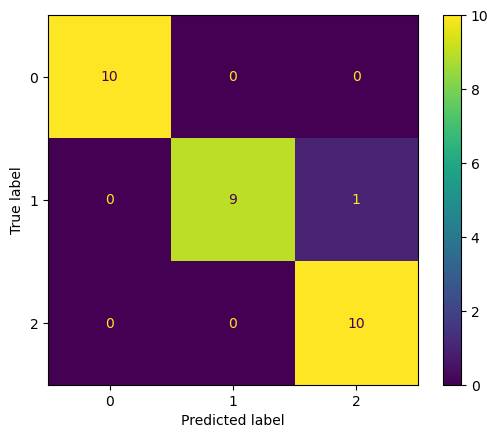

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_optimized); 
plt.show()

In [51]:
#random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [52]:
rf = RandomForestRegressor(random_state=42)


In [53]:
param_grid_rf = {
    "n_estimators": [50, 100],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5]
}


In [84]:
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=10,
    
)
#scoring="neg_root_mean_squared_error"

In [85]:
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]})

In [86]:
y_pred_rf = grid_rf.predict(X_test)


In [87]:
print("Best Parameters:", grid_rf.best_params_)
print("RMSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
RMSE: 0.04290544882317124
R2 Score: 0.9356418267652431


In [88]:
#y_pred_rf_cls = np.round(y_pred_rf)

In [89]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf_cls))

report = classification_report(y_test, y_pred_rf_cls) 
print("Classification Report:\n", report)

Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [93]:
from sklearn.ensemble import AdaBoostRegressor


In [94]:
ada = AdaBoostRegressor(random_state=42)


In [95]:
param_grid_ada = {
    "n_estimators": [50, 100],
    "learning_rate": [0.01, 0.1, 1]
}


In [77]:
"""grid_ada = GridSearchCV(
    estimator=ada,
    param_grid=param_grid_ada,
    cv=10,
    
)"""


In [96]:
grid_ada.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100]})

In [97]:
y_pred_ada = grid_ada.predict(X_test)



In [98]:
print("Best Parameters:", grid_ada.best_params_)
print("RMSE:", mean_squared_error(y_test, y_pred_ada))
print("R2 Score:", r2_score(y_test, y_pred_ada))
print("Accuracy:", accuracy_score(y_test, y_pred_ada_cls))
print("Classification Report:\n",
      classification_report(y_test, y_pred_ada_cls))


Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
RMSE: 0.0494030847795204
R2 Score: 0.9258953728307194
Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [99]:
y_pred_ada = grid_search.predict(X_test) 

accuracy_opt = accuracy_score(y_test, y_pred_ada) 
print(f"Accuracy (Optimized) : {accuracy_opt:.5f}")

report = classification_report(y_test, y_pred_ada) 
print("Classification Report:\n", report)

Accuracy (Optimized) : 0.96667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

